## **Calculation of descriptive statistics of the freshwater lens (FWL)**

> **Calculate statistics based on the three methods for estimating the depth of the FWL**

1. **Method 1:** _Intuitive Criterion_ **(IC)**  
2. **Method 2:** _Optimal BIC_ **(BIC)**  
3. **Method 3:** _Dupuit-Ghyben-Herzberg_ **(DGH)**

---

### Import Libraries

In [1]:
import sys
import os

root = os.path.abspath('..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import modules.statistics_fwl_estimation as st_fwl

from modules import processing, load, plots, analysis

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 25)

---

### Load data

In [2]:
df_fwl_estimation = pd.read_csv(f'{root}/data/selection_fwl_ic_bic_dgh.csv')
df_fwl_estimation.rename(columns={'vp_fwl_ic': 'vp_ic', 'vp_fwl_bic': 'vp_bic', 'vp_fwl_dgh': 'vp_dgh'}, inplace=True)
df_fwl_estimation = df_fwl_estimation[['ID', 'vp_ic', 'vp_bic', 'vp_dgh']]

df_fwl_estimation

,ID,vp_ic,vp_bic,vp_dgh
0,AW1D_YSI_20230826,16.317073,17.169116,16.386594
1,AW2D_YSI_20230815,9.563224,9.907636,11.319882
2,AW5D_YSI_20230824,14.134225,13.652858,12.090368
3,AW6D_YSI_20230815,13.216555,13.561559,13.844801
4,AW7D_YSI_20230814,13.290227,13.290227,13.316418
5,BW1D_YSI_20230824,14.125652,14.125652,14.117028
6,BW2D_YSI_20230819,13.997452,13.997452,14.581115
7,BW3D_YSI_20230818,11.701564,11.701564,12.974280
8,BW4D_YSI_20230816,14.358411,14.358411,14.124974
9,BW5D_YSI_20230822,12.393402,11.527182,10.262300


---

### **Filter profiles by vertical position for each method**

In [3]:
filtered_data = st_fwl.load_and_filter_data(df_fwl_estimation, 
                                            subfolder='rawdy')

filtered_data

{'AW1D_YSI_20230826': {'IC':       Vertical Position [m]  Corrected sp Cond [uS/cm]
  0                     0.001                    1304.60
  1                     0.004                    1302.00
  2                     0.006                    1303.50
  3                     0.007                    1303.50
  4                     0.008                    1304.30
  ...                     ...                        ...
  3048                 16.295                    2002.90
  3049                 16.296                    2002.10
  3050                 16.304                    2003.85
  3051                 16.307                    2003.70
  3052                 16.313                    2004.80
  
  [3053 rows x 2 columns],
  'BIC':       Vertical Position [m]  Corrected sp Cond [uS/cm]
  0                     0.001                     1304.6
  1                     0.004                     1302.0
  2                     0.006                     1303.5
  3                     

---

### **Statistics**

In [4]:
df_stats = st_fwl.compute_statistics(filtered_data, 
                                    df_fwl_estimation, 
                                    "Corrected sp Cond [uS/cm]"
                                     )

df_stats

,id,method,fwl_thickness,mean,std,cv,min,max,median,25%,50%,75%,iqr,count,outliers
0,AW1D_YSI_20230826,IC,16.317073,1575.951416,120.598105,0.076524,1302.000000,2004.80,1525.150000,1515.600000,1525.150000,1605.90000,90.300000,3053,269
1,AW1D_YSI_20230826,BIC,17.169116,1648.868238,354.147610,0.214782,1302.000000,3793.70,1530.200000,1515.800000,1530.200000,1660.40000,144.600000,3228,296
2,AW1D_YSI_20230826,DGH,16.386594,1577.652161,123.382048,0.078206,1302.000000,2015.70,1525.500000,1515.600000,1525.500000,1608.00000,92.400000,3065,258
3,AW2D_YSI_20230815,IC,9.563224,425.690598,25.702609,0.060379,389.000000,478.15,424.850000,404.250000,424.850000,449.20000,44.950000,585,0
4,AW2D_YSI_20230815,BIC,9.907636,428.632290,30.027030,0.070053,389.000000,562.50,425.600000,405.125000,425.600000,450.65000,45.525000,607,6
5,AW2D_YSI_20230815,DGH,11.319882,461.085426,96.072738,0.208362,389.000000,884.20,434.200000,407.350000,434.200000,459.15000,51.800000,693,92
6,AW5D_YSI_20230824,IC,14.134225,940.906805,334.346803,0.355345,685.100000,1924.40,756.950000,708.200000,756.950000,1009.97500,301.775000,2046,272
7,AW5D_YSI_20230824,BIC,13.652858,891.037775,271.087404,0.304238,685.100000,1704.90,753.000000,707.700000,753.000000,998.62500,290.925000,1932,173
8,AW5D_YSI_20230824,DGH,12.090368,805.082349,148.450434,0.184392,685.100000,1326.10,736.000000,704.838211,736.000000,883.10000,178.261789,1695,74
9,AW6D_YSI_20230815,IC,13.216555,560.045246,299.206969,0.534255,96.800000,1484.70,438.200000,431.475000,438.200000,466.75000,35.275000,1280,381


##### Save stats

In [5]:
df_stats.to_csv(f'{root}/data/statistics_profiles_methods.csv', 
                index=False)

---

### **Boxplots**

In [6]:
# Only base name
order_plot = [
    "LRS70D_YSI_20230822", # Last
    "BW9D_YSI_20230823", 
    "BW11D_YSI_20230823",
    "BW8D_YSI_20230823",
    "LRS81D_YSI_20230823",
    "BW1D_YSI_20230824",
    "LRS79D_YSI_20230827",
    "AW1D_YSI_20230826",
    "LRS90D_YSI_20230827",
    "AW2D_YSI_20230815",
    "AW5D_YSI_20230824",
    "BW2D_YSI_20230819",
    "LRS75D_YSI_20230819",
    "LRS89D_YSI_20230825",
    'LRS65D_YSI_20220812',
    "AW7D_YSI_20230814",
    "AW6D_YSI_20230815",
    "BW3D_YSI_20230818",
    "BW10D_YSI_20230825",
    "BW6D_YSI_20230826",
    "BW4D_YSI_20230816",
    "LRS69D_YSI_20230818",
    "LRS33D_YSI_20230822",
    "BW7D_YSI_20230826",
    "BW5D_YSI_20230822" # First
]

In [15]:
from typing import Dict, List, Optional, Tuple
from matplotlib import ticker

def calculate_outliers(data: np.ndarray) -> int:
    """
    Calculate the number of outliers in the data using the IQR method.
    
    Args:
        data (np.ndarray): 1D array of numerical values.
    
    Returns:
        int: Number of outliers.
    """
    if data.size == 0:
        return 0
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = np.sum((data < lower_bound) | (data > upper_bound))
    return int(outliers)


def generate_boxplots_matplotlib(
    filtered_data: Dict[str, Dict[str, pd.DataFrame]],
    variable: str,
    show_outliers: bool = True,
    order: Optional[List[str]] = None,
    methods_to_show: Optional[List[str]] = None,  
    legend_x: float = 1.02,
    legend_y: float = 1.0,
    legend_orientation: str = 'vertical',
    mirror_top_axis: bool = False,
    enable_minor_ticks: bool = False,
    draw_vertical_line: bool = False
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Generates horizontal boxplots with Matplotlib for each well and each filtering method.
    Optionally:
        - Adds a mirrored X-axis on the top (mirror_top_axis).
        - Displays minor ticks every 1000 units (enable_minor_ticks).
        - Draws a dotted vertical line at x=1452.9 (draw_vertical_line).

    Args:
        filtered_data (Dict[str, Dict[str, pd.DataFrame]]):
            Nested dictionary containing the filtered data.
            - First key: Well ID
            - Second key: Filtering method (e.g., 'IC', 'BIC', 'DGH').
        variable (str):
            Name of the column to be plotted (e.g., "Corrected sp Cond [uS/cm]" or "Vertical Position [m]").
        show_outliers (bool):
            Whether to display outliers in the boxplots.
        order (Optional[List[str]]):
            A list defining the order of the wells (well IDs) on the Y-axis.
            If a well ID is not listed here, it will be ignored.
            If not provided, the natural reading order of `filtered_data` is used.
        methods_to_show (Optional[List[str]]):
            List of filtering methods to display (e.g., ['IC', 'BIC', 'DGH']).
            If provided, only these methods will be plotted.
            If None, all methods present in `filtered_data` are displayed.
        legend_x (float):
            X position where the legend is anchored.
        legend_y (float):
            Y position where the legend is anchored.
        legend_orientation (str):
            Legend orientation: 'vertical' or 'horizontal'.
        mirror_top_axis (bool):
            If True, adds a mirrored X-axis at the top.
        enable_minor_ticks (bool):
            If True, activates minor ticks on the X-axis every 1000 units.
        draw_vertical_line (bool):
            If True, draws a dotted vertical line at x=1452.9.

    Returns:
        (fig, ax): The Matplotlib Figure and Axes objects.
    """

    # Dictionary to assign a specific color to each filtering method
    method_colors = {
        'BIC': 'blue',
        'IC': 'red',
        'DGH': 'green'
    }

    # 1) Collect data in a list of tuples (well_id, method, values) 
    #    in the natural reading order of 'filtered_data'
    plot_data = []
    for well_id, methods_dict in filtered_data.items():
        for method, df in methods_dict.items():
            values = df[variable].values
            plot_data.append((well_id, method, values))

    # 1.5) Filter plot_data by methods_to_show if provided
    if methods_to_show is not None:
        plot_data = [item for item in plot_data if item[1] in methods_to_show]

    # 2) If an 'order' list is provided, filter and reorder 'plot_data' 
    #    based on the position of the well_id in 'order'
    if order is not None:
        # Create a dictionary to store the index of each well ID in 'order'
        order_index = {well: i for i, well in enumerate(order)}

        # Keep only those tuples whose well_id is in 'order'
        plot_data = [item for item in plot_data if item[0] in order_index]

        # Sort by the index given in 'order'
        plot_data.sort(key=lambda x: order_index[x[0]])

    # 3) Build the final lists for plotting
    group_labels = []
    group_data = []
    method_list = []

    # Create labels, data arrays, and method entries for each tuple
    for well_id, method, values in plot_data:
        label = f"{well_id} - {method}"
        group_labels.append(label)
        group_data.append(values)
        method_list.append(method)

    # Create the figure and axes. 
    # The figure height depends on the number of labels.
    fig, ax = plt.subplots(figsize=(12, len(group_labels) * 0.5 + 2))

    # Positions on the Y-axis for each boxplot
    box_positions = np.arange(len(group_labels))

    # Decide how to display outliers: 'o' for showing, '' for hiding
    sym = 'o' if show_outliers else ''

    # Keep track of methods already added to the legend
    used_methods = set()

    # 4) Create boxplots grouped by method to ensure consistent colors
    unique_methods = sorted(set(method_list))
    for method in unique_methods:
        # Collect positions and data for this method
        method_positions = []
        method_data = []
        for i, (lbl, dat, meth) in enumerate(zip(group_labels, group_data, method_list)):
            if meth == method:
                method_positions.append(i)
                method_data.append(dat)

        # If there is data for this method, draw the boxplot
        if method_positions:
            color = method_colors.get(method, 'gray')
            bp = ax.boxplot(
                method_data,
                positions=method_positions,
                sym=sym,
                vert=False,
                widths=0.6,
                patch_artist=True
            )

            # Customize boxplot colors
            for box in bp['boxes']:
                box.set(color=color, facecolor=color, alpha=0.7)
            for whisker in bp['whiskers']:
                whisker.set(color=color)
            for cap in bp['caps']:
                cap.set(color=color)
            for median in bp['medians']:
                median.set(color='black')
            for flier in bp['fliers']:
                flier.set(marker='o', markerfacecolor=color, markersize=5, alpha=0.7)

            # Add legend entry for this method, but only once
            if method not in used_methods:
                ax.plot([], [], color=color, label=method)
                used_methods.add(method)

    # 5) Add annotations to the right side indicating 'n' and outliers
    for i, data in enumerate(group_data):
        n_points = len(data)
        n_outliers = calculate_outliers(data)
        annotation_text = f"n={n_points}, out={n_outliers}"
        x_max = ax.get_xlim()[1]
        ax.text(x_max * 1.05, i, annotation_text,
                verticalalignment='center', fontsize=10)

    # Configure the Y-axis with labels
    ax.set_yticks(box_positions)
    ax.set_yticklabels(group_labels)

    # Set axis labels and title
    ax.set_xlabel(variable)
    ax.set_ylabel("Well - Filtering Method")
    ax.set_title(f"Boxplots of {variable} by Well and Filtering Method",
                 pad=20, y=1.01)

    # Display major grid on the X-axis
    ax.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

    # Optionally enable minor ticks every 1000 units on the X-axis
    if enable_minor_ticks:
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(1000))
        ax.grid(True, which='minor', axis='x', linestyle=':', alpha=0.2)

    # Optionally draw a vertical line at x=1452.9
    if draw_vertical_line:
        ax.axvline(x=1452.9, color='black', linestyle='--', label='x = 1452.9')

    # Optionally add a mirrored X-axis at the top
    if mirror_top_axis:
        ax.tick_params(top=True, labeltop=True, bottom=True, labelbottom=True)

    # Adjust right margin to leave room for annotations
    plt.subplots_adjust(right=0.75)

    # Configure the legend
    legend_loc = 'upper right' if legend_x > 0.5 else 'upper left'
    ax.legend(
        loc=legend_loc,
        bbox_to_anchor=(legend_x, legend_y),
        frameon=True,
        framealpha=0.8,
        title="Method"
    )

    # Final layout adjustments
    fig.tight_layout()

    # Return the figure and axes for further use if needed
    return fig, ax

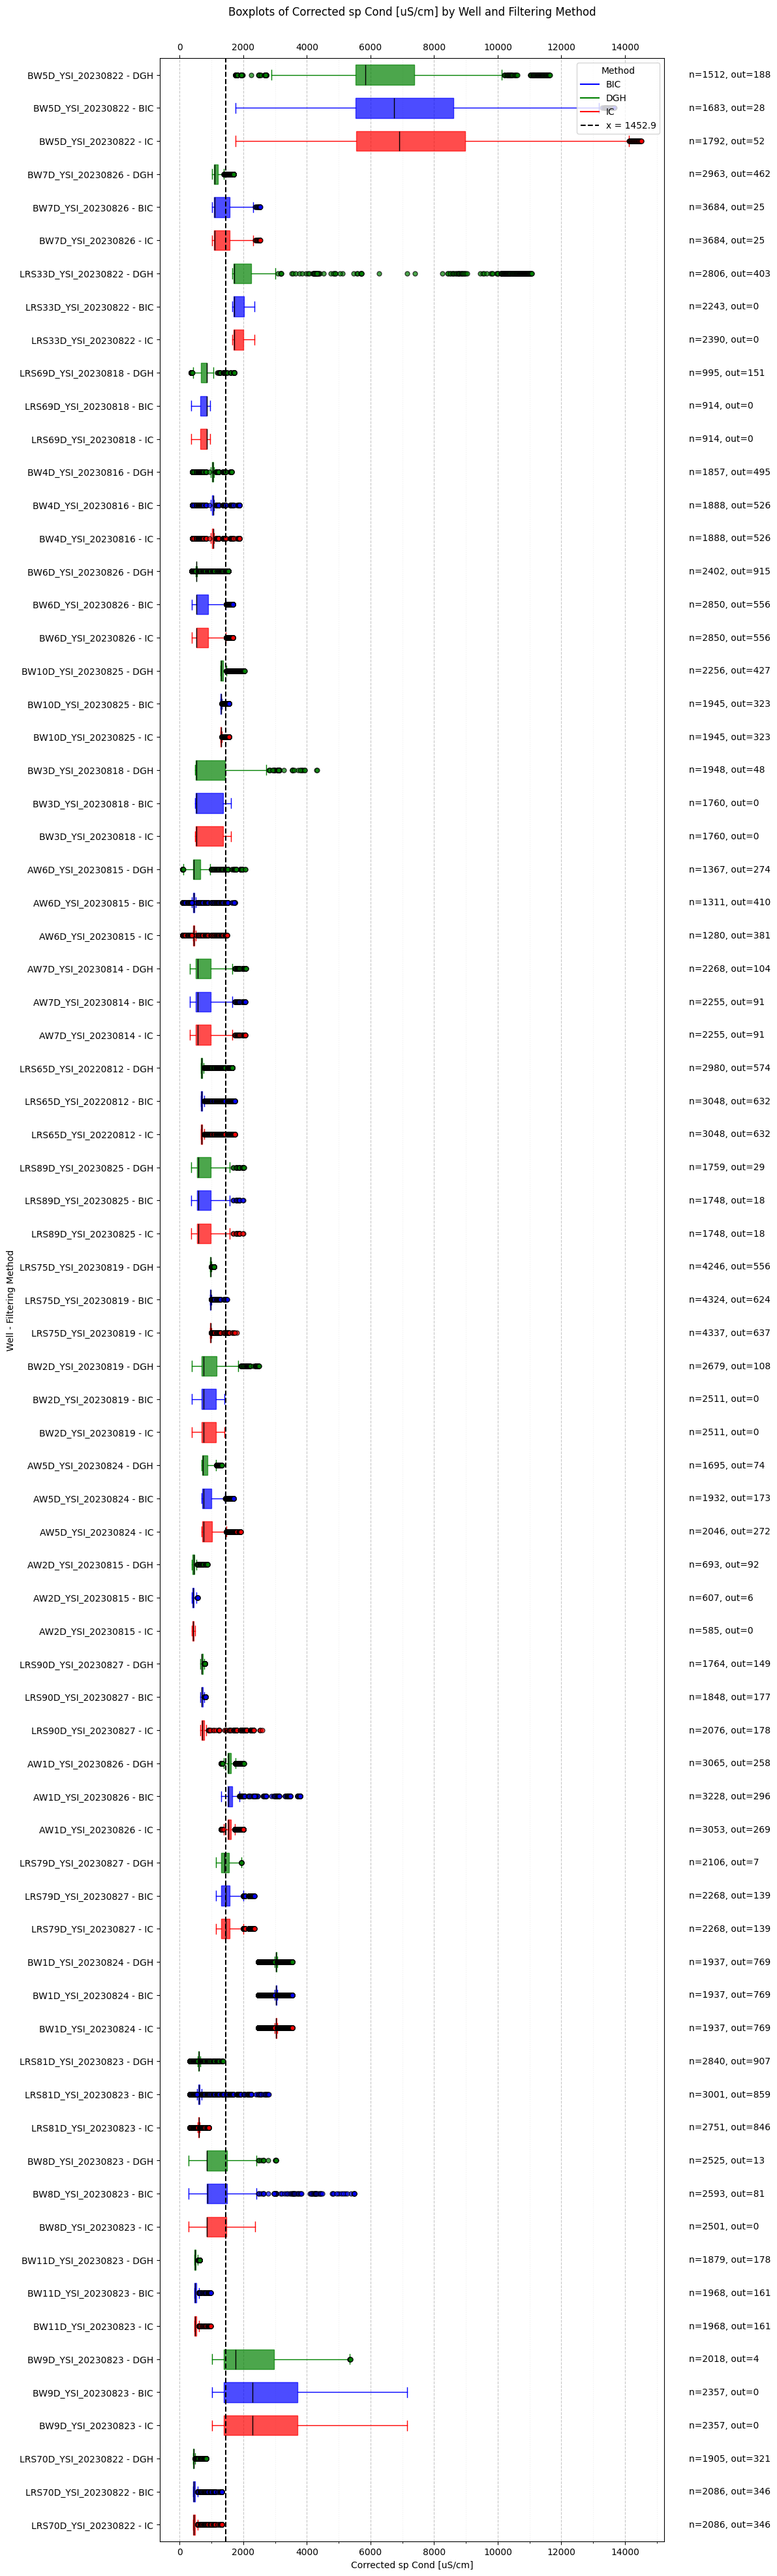

In [ ]:
fig = generate_boxplots_matplotlib(filtered_data, 
                        variable="Corrected sp Cond [uS/cm]", 
                        show_outliers=True,
                        order= order_plot, 
                        legend_x=1.0,
                        legend_y=1.0, 
                        legend_orientation='h',
                        mirror_top_axis=True,
                        enable_minor_ticks=True,
                        draw_vertical_line=True,
                        # Capital letters only
                        methods_to_show= ['DGH', 'BIC', 'IC'] # ['BIC'], ['IC'], ['DGH'], ['IC', 'BIC'], ['IC', 'DGH'], ['BIC', 'DGH'], ['IC', 'BIC', 'DGH']
                        )